# Artificial Intelligence (Assignment)
### Implementation of linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profts for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
prorts and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The fille ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss. 

## Reading and Ploting Data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.). Import the following load the dataset, visualize it and perform the numerical operations using numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data may be loaded using the __loadtxt()__ funcation. In the following code we are loading the the data from file __ex1data1.txt'__ into a variable __data__. In __"data"__, the first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

In [2]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
x = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


As we discussed in the class that the features in data will be represented by __x__ and the target labls will be represented by __y__.
To follow our representation conventions we need to load the fist column of __data__ into __x__ and second column into __y__:

The number of traing records (or samples) is represented by $m$, as we discussed in the class. For the given problem $m$ is computed as follows:

In [3]:
m=np.size(x)
m

97

To plot the given data we ues the __scatter()__ function

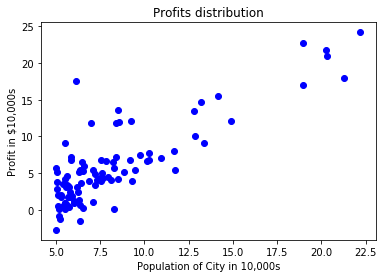

In [4]:
#Plot the data
plt.scatter(x, y, marker='o', c='b')
plt.title('Profits distribution')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# Gradient Descent
In this part, you will fit the linear regression parameters $w_1$ and $b$ to our dataset
using gradient descent.
### Update Equations
The objective of linear regression is to minimize the cost function

$J(w_1,b)=\frac{1}{2m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$

where the hupothesis $\hat{y}$ is given by linear model:

$\hat{y}^{(i)}=w_1x_1^{(i)}+b$

Recall that the parameters of your model are the $w_1$ (also be represented by $\theta_0$) and $b$ (also be represented by $\theta_1$) values. 


In [5]:

def compute_cost(x, y, w1,b,m):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    y_hat = w1*x+b    
    sqErrors = np.power((y_hat - y), 2)
    J =  np.sum(sqErrors)/(2*m)
    return J


In [7]:
w1=1
b=2
print("The cost is=",compute_cost(x, y, w1,b,m))

The cost is= 14.087185439837112


## Gradient Descent Algorithm
Our objective is to  minimize cost function $J(w_1,b)$ for $w_1$ and $b$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update:

1.  Initailize $\alpha$, $w_1$, $b$ and $error$
2. $while(j(w_1,b)>error:$

   $w_1=w_1-\frac{\alpha}{m}\sum_{i=1}^m(w_1x_1^{(i)}+b-y^{(i)})x_1^{(i)}$

   $b=b-\frac{\alpha}{m}\sum_{i=1}^m(w_1x_1^{(i)}+b-y^{(i)})$
   
In the following cell you need to implement  the cost function. 

In [8]:
def gradient_descent(x, y, w1,b,alpha, num_iters,error,m):
    '''
    Performs gradient descent to learn the parameters w1 and b
    by taking num_items gradient steps with learning
    rate alpha
    '''
    J_history =[] #The "J_history" will be used to store the value of cost function at 
    #different iterations.
    
    J=100000 ## set the cost to maximum value
    it=1
    while(it<num_iters and J>error): # The convergence contain two factors 1) number of iterations 2) the value of the cost
        #function. If one of the condition get false the traing will be stoped
        y_hat= None
        db = None # derivatives w.r.t to b 
        dw1 = None #derivatives w.r.t w1

        b = None
        w1 = None
        J=compute_cost(x, y, w1,b,m)
        J_history.append(J)
        it+=1

    return w1,b, np.array(J_history)

In [9]:
#initialize the parameters
w1=1
b=2
alpha = 0.01
error=2
iterations = 15000

#Run the gradient descent algorithm
w1,b, J_history = gradient_descent(x, y, w1,b, alpha, iterations,error,m)


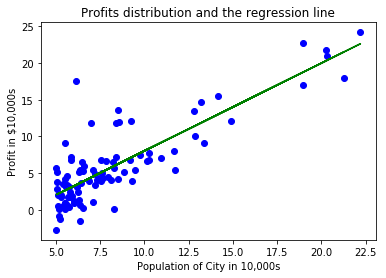

In [10]:
#Compute the predicted line (regression line)
y_pred = w1*x+b 
plt.scatter(x, y, marker='o', c='b') #plot the orignal data

# plotting the regression line 
plt.plot(x, y_pred, color = "g") 
#plt.plot(x, y_pred, color = "r")
plt.title('Profits distribution and the regression line')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [11]:
np.size(J_history)

14999

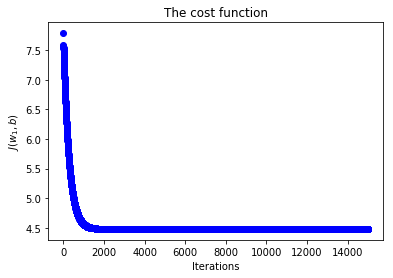

In [13]:
# Ploting the cost function
it=np.arange(1,np.size(J_history)+1)
plt.scatter(it, J_history, marker='o', c='b')
plt.title('The cost function')
plt.xlabel('Iterations')
plt.ylabel('$J(w_1,b)$')
plt.show()


## Testing

Perform the cross validation of the given model with the orignal data. You need to enter the $x^{(i)}$ the the model will predict the output value $\hat{y)$. In the given dataset you have 97 records.

In [14]:
i=int(input("enter a value between 1--97:       "))
print("The guven label, y=",y[i],"The predicted label, y_hat",w1*x[1]+b )


enter a value between 1--97:       19
The guven label, y= 5.3893 The predicted label, y_hat 2.6989511966795656
